In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
# from keras.applications import ResNet18
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam

2024-03-06 21:12:30.846448: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-06 21:12:30.870084: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-06 21:12:31.197038: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from keras.applications import ResNet50

In [3]:
dataset_dir = "../dataset_output/google_asl/imgs/"

In [4]:
img_size = (224, 224)
batch_size = 64

In [5]:
datagen = ImageDataGenerator(
#     rescale=1./255,
    validation_split=0.3,  # Splitting data into train and validation
)

In [6]:
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Training data subset
)

Found 18511 images belonging to 70 classes.


In [7]:
validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Validation data subset
)

Found 7892 images belonging to 70 classes.


In [8]:
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

2024-03-06 21:12:41.551844: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-06 21:12:41.570839: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-06 21:12:41.571015: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-06 21:12:41.573977: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-06 21:12:41.574286: I tensorflow/compile

In [9]:
# Freeze the convolutional base
for layer in resnet.layers:
    layer.trainable = False

In [16]:
model = Sequential([
    resnet,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(70, activation='softmax')  # 70 output classes
])

In [17]:
model.compile(optimizer=Adam(learning_rate=10e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/50
289/289 [==============================] - 73s 249ms/step - loss: 4.8822 - accuracy: 0.0147 - val_loss: 4.2483 - val_accuracy: 0.0158
Epoch 2/50
289/289 [==============================] - 75s 258ms/step - loss: 4.2485 - accuracy: 0.0156 - val_loss: 4.2476 - val_accuracy: 0.0158
Epoch 3/50
289/289 [==============================] - 73s 252ms/step - loss: 4.2491 - accuracy: 0.0152 - val_loss: 4.2473 - val_accuracy: 0.0158
Epoch 4/50
289/289 [==============================] - 69s 238ms/step - loss: 4.2475 - accuracy: 0.0157 - val_loss: 4.2471 - val_accuracy: 0.0158
Epoch 5/50
289/289 [==============================] - 68s 237ms/step - loss: 4.2473 - accuracy: 0.0146 - val_loss: 4.2471 - val_accuracy: 0.0158
Epoch 6/50
289/289 [==============================] - 68s 234ms/step - loss: 4.2492 - accuracy: 0.0157 - val_loss: 4.2470 - val_accuracy: 0.0156
Epoch 7/50
289/289 [==============================] - 69s 241ms/step - loss: 4.2472 - accuracy: 0.0154 - val_loss: 4.2470 - val_ac

In [13]:
from matplotlib import pyplot as plt

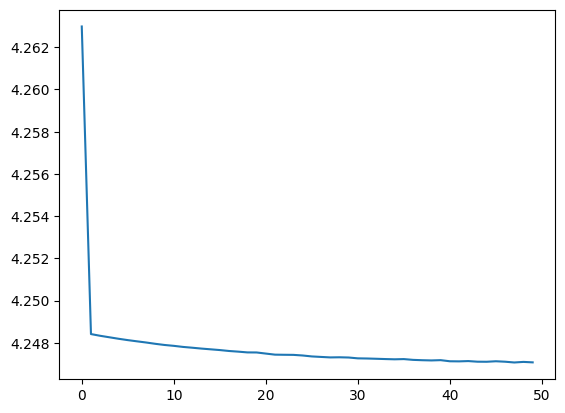

In [14]:
plt.plot(history.history["loss"])